In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import os
import gzip
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# **Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Machine Learning/Assignment3/SecC

Mounted at /content/drive
/content/drive/MyDrive/Machine Learning/Assignment3/SecC


In [11]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y = train_df["label"]
X = train_df.drop(["label"],axis =1)
X_np = X.to_numpy()
y_np = y.to_numpy()
X_np = X_np/255

In [13]:
y_test = test_df["label"]
X_test = test_df.drop(["label"],axis =1)
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
X_test = X_test/255

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=77)

# **Part A**

In [38]:
def plot_values(train_losses, val_losses, activation , train_acc , test_acc):
    activation = ['tanh', 'relu' , 'logistic' , 'identity']

    for i in range(len(train_losses)):
        # print("activation : " , activation[i])
        validation_score = val_losses[i]
        validation_loss = [1-x for x in validation_score]
        plt.plot(validation_loss , label="validation")
        plt.plot(train_losses[i] , label="train")
        plt.ylim(0, 1)
        plt.title("Loss vs Epochs : " + activation[i])
        plt.legend()
        plt.show()
        print("Train Accuracy:" , train_acc[i] , "Test Accuracy:" , test_acc[i] )

In [27]:
activation = ['tanh', 'relu' , 'logistic' , 'identity']
train_losses = []
val_losses = []
train_acc = []
test_acc = []
for i in activation:
    print("Activation-", i , " Layers-", (256,32) , " max_epochs-", 400 , " batch_size-", 64)
    mlp = MLPClassifier(activation=i, hidden_layer_sizes=(256,32), max_iter= 400 , batch_size=64 ,  early_stopping=True , validation_fraction=0.15 , random_state=97)
    mlp.fit(X_np, y_np)
    print(mlp.score(X_np,y_np))
    train_losses.append(mlp.loss_curve_)
    val_losses.append(mlp.validation_scores_)
    train_acc.append(mlp.score(X_np , y_np))
    test_acc.append(mlp.score(X_test , y_test))

Activation- tanh  Layers- (256, 32)  max_epochs- 400  batch_size- 64
0.9289166666666666
Activation- relu  Layers- (256, 32)  max_epochs- 400  batch_size- 64
0.9468333333333333
Activation- logistic  Layers- (256, 32)  max_epochs- 400  batch_size- 64
0.9323
Activation- identity  Layers- (256, 32)  max_epochs- 400  batch_size- 64
0.8611666666666666


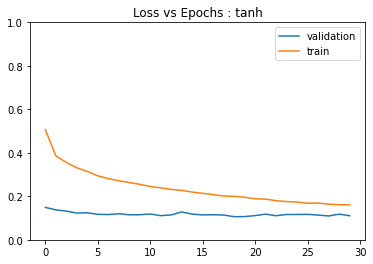

Train Accuracy: 0.9289166666666666 Test Accuracy: 0.8945


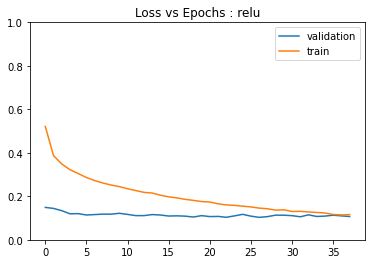

Train Accuracy: 0.9468333333333333 Test Accuracy: 0.8956


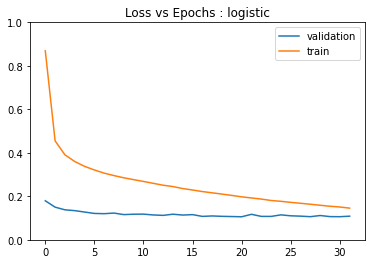

Train Accuracy: 0.9323 Test Accuracy: 0.8964


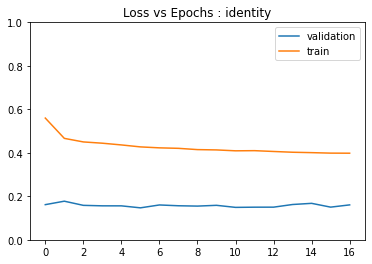

Train Accuracy: 0.8611666666666666 Test Accuracy: 0.8567


In [39]:
plot_values(train_losses, val_losses, activation , train_acc , test_acc)

# **Part b**

activation-relu layer_size-(256,32) max_iter-400 batch_size-64 learning rate- 0.1
Accuracy-  0.1


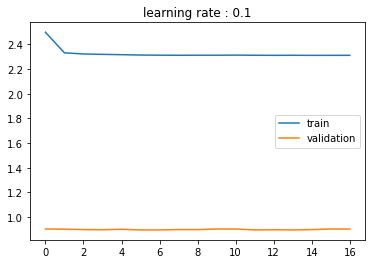

activation-relu layer_size-(256,32) max_iter-400 batch_size-64 learning rate- 0.01
Accuracy-  0.8963333333333333


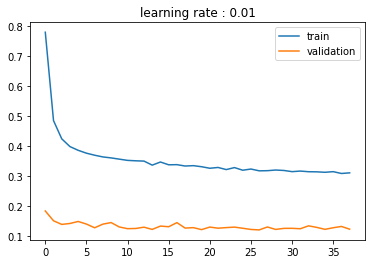

activation-relu layer_size-(256,32) max_iter-400 batch_size-64 learning rate- 0.001
Accuracy-  0.9463833333333334


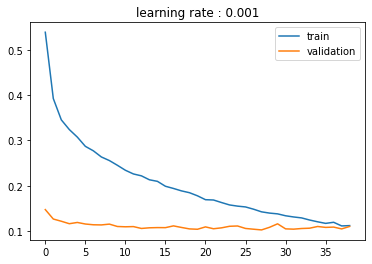

activation-relu layer_size-(256,32) max_iter-400 batch_size-64 learning rate- 0.0001
Accuracy-  0.9310833333333334


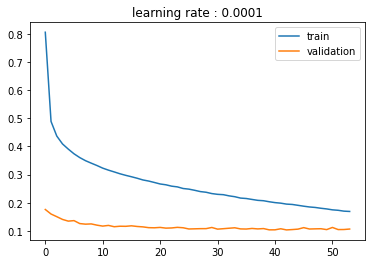

In [43]:
learning_rate = [0.1 , 0.01 , 0.001 , 0.0001]
train_losses = []
val_losses = []

for i in learning_rate:
    print("activation-relu layer_size-(256,32) max_iter-400 batch_size-64 learning rate-",i)
    mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(256,32), max_iter= 400 , batch_size=64 ,  early_stopping=True , validation_fraction=0.15 , random_state=33 , learning_rate_init=i)
    mlp.fit(X_np, y_np)
    print ("Accuracy- ", mlp.score(X_np, y_np))
    val_sc = mlp.validation_scores_
    val_loss = [1-x for x in val_sc]
    plt.plot(mlp.loss_curve_ , label="train")
    plt.plot(val_loss , label="validation")
    plt.title("learning rate : " + str(i))
    plt.legend()
    plt.show()
    train_losses.append(mlp.loss_curve_)
    val_losses.append(mlp.validation_scores_)

# **Part c**

activation-relu layer_size-(256,32) max_iter-400 batch_size-64 learning rate- (256, 16)
Accuracy-  0.9268833333333333


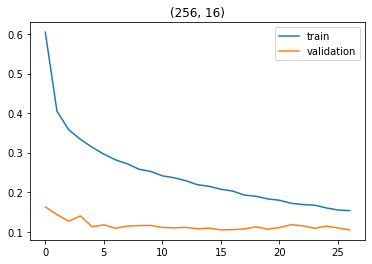

activation-relu layer_size-(256,32) max_iter-400 batch_size-64 learning rate- (128, 32)
Accuracy-  0.9232333333333334


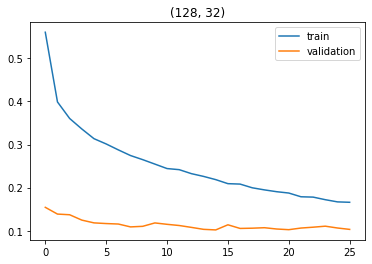

activation-relu layer_size-(256,32) max_iter-400 batch_size-64 learning rate- (64, 32)
Accuracy-  0.9307


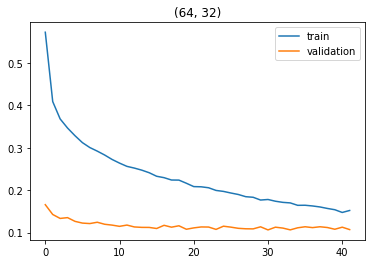

activation-relu layer_size-(256,32) max_iter-400 batch_size-64 learning rate- (32, 16)
Accuracy-  0.9064833333333333


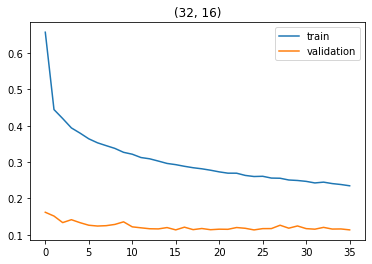

In [45]:
hidden_layer_sizes=[(256,16) , (128 , 32) , (64 , 32) , (32 , 16)]
train_losses = []
val_losses = []
for i in hidden_layer_sizes:
    print("activation-relu layer_size-(256,32) max_iter-400 batch_size-64 learning rate-",i)
    mlp = MLPClassifier(activation='relu', hidden_layer_sizes=i, max_iter= 400 , batch_size=64 ,  early_stopping=True , validation_fraction=0.15 , random_state=33 , learning_rate_init=0.001)
    mlp.fit(X_np, y_np)
    print ("Accuracy- ", mlp.score(X_np, y_np))
    val_sc = mlp.validation_scores_
    val_loss = [1-x for x in val_sc]
    plt.plot(mlp.loss_curve_ , label="train")
    plt.plot(val_loss , label="validation")
    # plt.xlim(0, 60)
    # plt.ylim(0, 1)
    plt.title(i)
    plt.legend()
    plt.show()
    train_losses.append(mlp.loss_curve_)
    val_losses.append(mlp.validation_scores_)

# **Part d**

In [46]:
parameter_space = {
    'hidden_layer_sizes': [(256,64) , (256,32) , (256 , 128)],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.001 , 0.01],
    'alpha': [0.0001 , 0.001 , 0.01],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier(random_state=33 , max_iter = 800 , batch_size=64 , activation='relu')
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=2)
clf.fit(X_np, y_np)

In [ ]:
print('Best parameters found:\n', clf.best_params_)

In [ ]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
y_true, y_pred = y_test , clf.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))